# Introdução

Uma certa empresa está tendo muitas evasões do ambiente de trabalho por N fatores. Ao sair da empresa cada colaborador responde á uma pesquisa sobre o motivo de saída e uma empresa de RH terceirizada também realisa essa pesquisa. Daí vamos tentar entender o que está acontecendo e como isso pode impactar nos processos da empresa contratante.

A empresa de RH preparou a seguinte visualização para mostrar como estava a evasão:

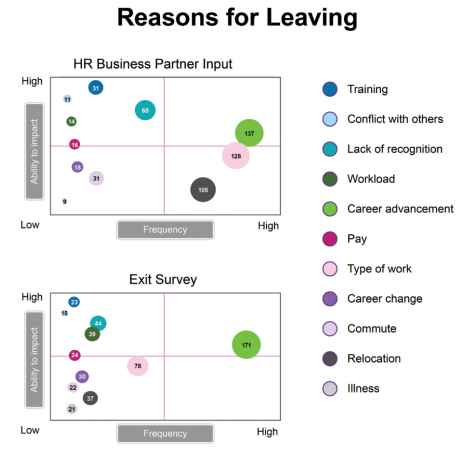

Essa visualização tem uma semelhança com a matriz de eisenhower. Vamos analisar o primeiro gráfico que foi produzido pelo HRPB onde vemos que no eixo Y mede a capacidade de impacto e no eixo X mede a frequência com que isso acontece.

No quadrante superior direito vai estar os motivos que mais acontecem (High Frequency) e que também tem uma alta capacidade de impacto(High Ability to impact). Já no quadrante inferior esquerdo é totalmente o oposto. Como pode ver os círculos maiores sempre estão do lado direito e os círculos menores estão do lado esquerdo.

- **Capacidade de Impacto** (``Ability to impact``) pode ser o quão esse motivo imfluencia na decisão do funcionário.
- **Frequência** (``Frequency``) pode ser a frequência com que aquele motivo é informada por cada funcionário na sua saída.

Com essa interpretação vamos responder algumas perguntas:

## 1. O que está sendo mostrado nesse gráfico?

Para responder a esta pergunta temos que analisar alguns pontos tais como:
- *O quão importante é esse motivo para o funcionário?*
-- pois motivos que são essenciais como por exemplo falta de reconhecimento podem ter uma capacidade de impacto maior na decisão dele.
- *Outro ponto é quais as consequências desse motivo na vida do funcionário?*
-- pois se o motivo tem implicações significativas na qualidade de vida, na carreira ou no bem-estar financeiro do funcionário como por exemplo pagamentos, ele provavelmente terá uma capacidade de impacto maior.
- *Um último ponto é com que frequência esse motivo é mencionado pelos funcionários que sai?*
-- pois se muitos funcionários citam o mesmo motivo como uma das razões para a sua saída isso pode indicar que esse motivo tem uma capacidade substancial.¹

Com esses pontos listados podemos supor que são feitas duas pesquisas durante a solicitação de saída do funcionário, uma feita diretamente pela empresa e outra feita pela empresa terceirizada (HRBP) e com isso temos os dois gráficos na visualização.

Vemos que um dos motivos que mais impacta na saída do funcionário é a progressão de carreira (``Career advancement``) e que também é o motivo mais relatado em ambas as pesquisas. Já o motivo de doença (``illness``) é o que menos impacta na saída e também é que menos aparece em ambas as pesquisas.

Para um melhor entendimento vamos separar os motivos por categorias:

|CATEGORIA|MOTIVOS|
|-----------------------------------|------------------------------|
| Trabalho e Carreira                                              |
|                                   | - TREINAMENTOS               |
|                                   | - CARGA HORÁRIA              |
|                                   | - FALTA DE RECONHECIMENTO    |
|                                   | - PAGAMENTO                  |
|                                   | - MUDANÇA DE CARREIRA        |
|                                   | - PROGRESSÃO DE CARREIRA     |
|                                   | - TIPO DE TRABALHO           |
| Relações Interpessoais                                           |
|                                   | - CONFLITOS                  |
| Logística e Localização                                          |
|                                   | - TRAJETO                    |
|                                   | - REALOCAÇÃO                 |
| Saúde                                                            |
|                                   | - DOENÇA                     |

Através desta categorização podemos tirar conclusões tais como:

- Motivos que estão nas categorias de Trabalho e Carreira e Relações Interpessoais estão com alta capacidade de impacto na tomada de decisão de saída dos funcionários;
- Motivos que estão nas categorias de Logística e Localização e Saúde têm baixa capacidade de impacto;

## Que observações podemos fazer a partir desses dados?

Analizando os quadrantes separadamente podemos ter as seguintes observações:

1. Os motivos que estão no quadrante superior direito (``High Impact, High Frequency``) representam motivos de saída que ocorrem com alta frequência e têm um alto impacto na decisão dos funcionários de deixar a empresa. **Esses motivos são críticos e devem ser abordados com prioridade**;

2. Os motivos no quadrante inferior esquerdo (``Low Impact, Low Frequency``) representam motivos de saída que têm um impacto menor e ocorrem com pouca frequência. **Esses motivos podem ser de menor prioridade na análise da evasão de funcionários**.

##  Mas, o que não é ideal ou poderia ser evitado na visualização em sua forma atual? Que perguntas podemos fazer ou que feedback daremos para quem fez o gráfico?

O intuito dos gráficos é a visualização clara dos dados. Na visualização feita podemos aplicar melhorias tais como a escolha de um gráfico mais adequado para um fácil entendimento por todos que verão. Outro ponto seria após montar a visualização acima, criar uma outra trazendo a média das pesquisas em cada motivo para assim ter uma melhor visão de quais motivos estão afetando mais através de um único ponto de vista.

Podemos perguntar ao HRBP qual dos dois gráficos usaria na tomada de decisão e claramente não haverá uma boa tomada de decisão pois estamos nos baseando em apenas uma pesquisa sem considerar a outra. Por isso a necessidade da média entre elas.

Vamos importar os dados usados para as visualições para usarmos.

In [75]:
# Biblioteca necessária
import pandas as pd

# Armazenando os dados na variável
dados = pd.read_excel('[SE] [M5] Projeto Individual - FONTE DE DADOS.xlsx')
dados.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,NaN,NaN,NaN,NaN,NaN
1,NaN,Dados,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,Ability to impact,HRBP,Exit survey
4,NaN,Training,11,31,23


Ao importar os dados para análise e geração de novas visualizações vemos que o mesmo está muito desorganizado precisando assim de um tratamento. Vamos apagar os registros nulos e renomear os atributos.

In [76]:
dados.drop(labels='Unnamed: 0', axis=1, inplace=True) # Deletando a coluna 'Unnamed: 0' por ter nenhum dado
dados.drop(index=[0,1,2], inplace=True) # Deletando os registros no índices 0 á 2 por não conter dadaos
dados.head() # Mostrando como ficou

,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4
3,NaN,Ability to impact,HRBP,Exit survey
4,Training,11,31,23
5,Conflict with others,10,11,15
6,Lack of recognition,9,65,44
7,Workload,8,14,39


Já deletamos o atributo e os registros nulos. Mas os atributos ainda estão sem nome. Então vamos transformar o registro da primeira linha em coluna e reorganizar os índices.

In [77]:
# Inserindo o título da coluna dos motivos de saída
dados.iloc[0, dados.columns.get_loc('Unnamed: 1')] = 'Reasons for Leaving'

# Nomeando as colunas
dados.columns = dados.iloc[0]

# Deletando o registro usado para nomear as colunas
dados.drop(index=3, inplace=True)

# Reorganizando os índices
dados.reset_index(drop=True, inplace=True)

# Mostrando como ficou
dados.head()

3,Reasons for Leaving,Ability to impact,HRBP,Exit survey
0,Training,11,31,23
1,Conflict with others,10,11,15
2,Lack of recognition,9,65,44
3,Workload,8,14,39
4,Career advancement,7,137,171


Agora com nossos dados limpos vamos salvar para utiliza-los na criação dos gráficos.

In [79]:
# Salvando novo arquivo limpo
dados.to_excel('Data_Evasion_of_Employees_CLEANED.xlsx', sheet_name='Data_CLEANED', index=False, na_rep='', header=True)

Com os dados limpos e formatados, iremos criar as visualizações com o Tableau